In [11]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [12]:
EE = 1.0
lambdaE = 1.0
#
nexp = 5
#
ta = (2.0**nexp) * lambdaE  # annealing time
t_c = 0.311155 * ta         # crit point
#
with h5py.File('MPS_E_data_ta_{}.h5'.format(round(ta,6)),'r') as hf:
    t = hf.get('t')                 # t/t_c
    mag_x = hf.get('magx')          # longitudinal magnetization
    mag_z = hf.get('magz')          # transverse magnetization
    E_mag_x = hf.get('Emagx')       # bias energy energy
    E_mag_z = hf.get('Emagz')       # transverse field energy
    E_xx = hf.get('Exx')            # NN interaction energy
    E_tot = hf.get('Etot')          # total energy
    t = np.array(t)
    mag_x = np.array(mag_x)
    mag_z = np.array(mag_z)
    E_mag_x = np.array(E_mag_x)
    E_mag_z = np.array(E_mag_z)
    E_xx = np.array(E_xx)
    E_tot = np.array(E_tot)
    hf.close()
#
with h5py.File('MPS_domSize_data_ta_{}.h5'.format(round(ta,6)),'r') as hf:
    domSize = hf.get('domSize')     # domain size A
    domProbA = hf.get('domProb')    # domain probability times A (A_PA)
    domSize = np.array(domSize)
    domProbA = np.array(domProbA)
    hf.close()
print(domProbA.shape,domSize.shape)

(100,) (100,)


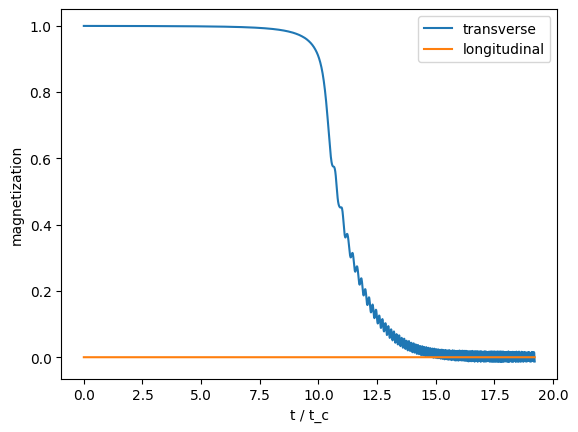

In [13]:
# plot magnetization
#
plt.plot(t,mag_z, label='transverse')
plt.plot(t,mag_x, label='longitudinal')
plt.ylabel("magnetization")
plt.xlabel("t / t_c")
plt.legend()
plt.show()

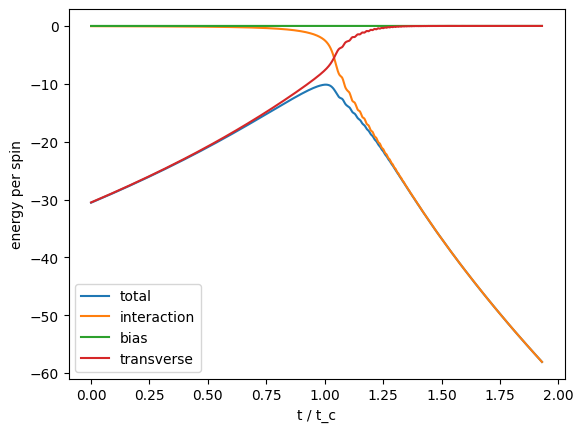

In [14]:
# plot energies
plt.plot(t/t_c, E_tot, label='total')
plt.plot(t/t_c, E_xx, label='interaction')
plt.plot(t/t_c, E_mag_x, label='bias')
plt.plot(t/t_c, E_mag_z, label='transverse')
plt.ylabel("energy per spin")
plt.xlabel("t / t_c")
plt.legend()
plt.show()

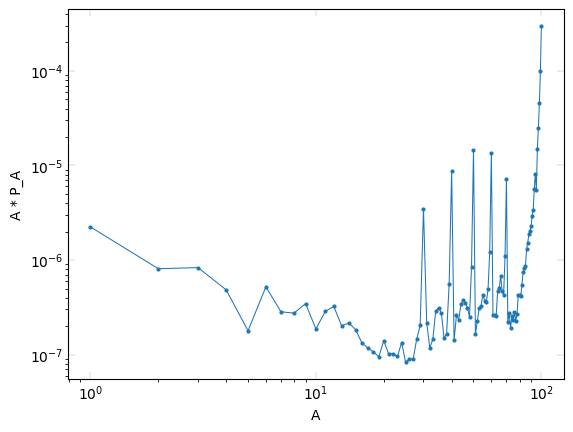

In [15]:
# plot domain distribuition
# calculated over 100000 samples
#
plt.plot(domSize, domProbA, marker='o', linestyle='-', ms=2, lw=0.75)  # 'o' marks the dots
plt.yscale('log')
plt.xscale('log')
plt.xlabel("A")
plt.ylabel("A * P_A")
plt.tick_params(axis='both', which='major', direction='in', labelsize=10, length=5, width=0.1, bottom=True, top=True, left=True, right=True)
plt.show()